In [1]:
from data_viz import *
from data_model import *
from data_model_train_test_split import *

# Analyse exploratoire

In [2]:
describe, median = df_infos()
describe

,Unnamed: 0,SalePrice,GarageArea,LotArea,TotalBsmtSF,GrLivArea,2ndFlrSF,1stFlrSF
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,729.867718,180956.097327,473.043866,10522.307745,1057.489376,1515.331049,346.723783,1162.758739
std,421.520303,79458.543984,213.864278,9982.490218,438.849769,525.636105,436.557331,386.687362
min,0.000000,34900.000000,0.000000,1300.000000,0.000000,334.000000,0.000000,334.000000
25%,365.500000,129950.000000,333.000000,7559.000000,795.500000,1129.000000,0.000000,882.000000
50%,730.000000,163000.000000,480.000000,9480.000000,992.000000,1464.000000,0.000000,1088.000000
75%,1094.500000,214000.000000,576.000000,11603.000000,1298.500000,1777.500000,728.000000,1391.500000
max,1459.000000,755000.000000,1418.000000,215245.000000,6110.000000,5642.000000,2065.000000,4692.000000


In [3]:
median

Unnamed: 0        730.0
SalePrice      163000.0
GarageArea        480.0
LotArea          9480.0
TotalBsmtSF       992.0
GrLivArea        1464.0
2ndFlrSF            0.0
1stFlrSF         1088.0
dtype: float64

Les valeurs numériques ont été gardées (en dehors du prix de vente exprimé en dollars, toutes les autres valeurs sont exprimées en pied carré) : 
- notre target (y) est le prix de vente (SalePrice)
- nos features (X) sont : 
    - la superficie du garage (GarageArea)
    - la superficie du terrain (LotArea)
    - la superficie totale du sous-sol(TotalBsmtSF)
    - la surface habitale au rez-de-chaussée (GrLivArea)
    - la surface habitale au 1er étage (1stFlSF)
    - la surface habitale au 2nd étage (2ndFlSF)

La moyenne (µ),de notre target (y), SalePrice est de 180 956.097327 dollars. 

L'écart-type (σ) de 79 458.543984 nous laisse supposer une forte dispersion des données avec des outliers qui tendent à gonfler σ. Ces outliers sont confirmés en partie par la valeur minimum de 34 900 dollars et de 755 000 dollars. 

La médianne de 163 000 dollars nuance ces valeurs extrêmes. 

# Visualisation exploratoire

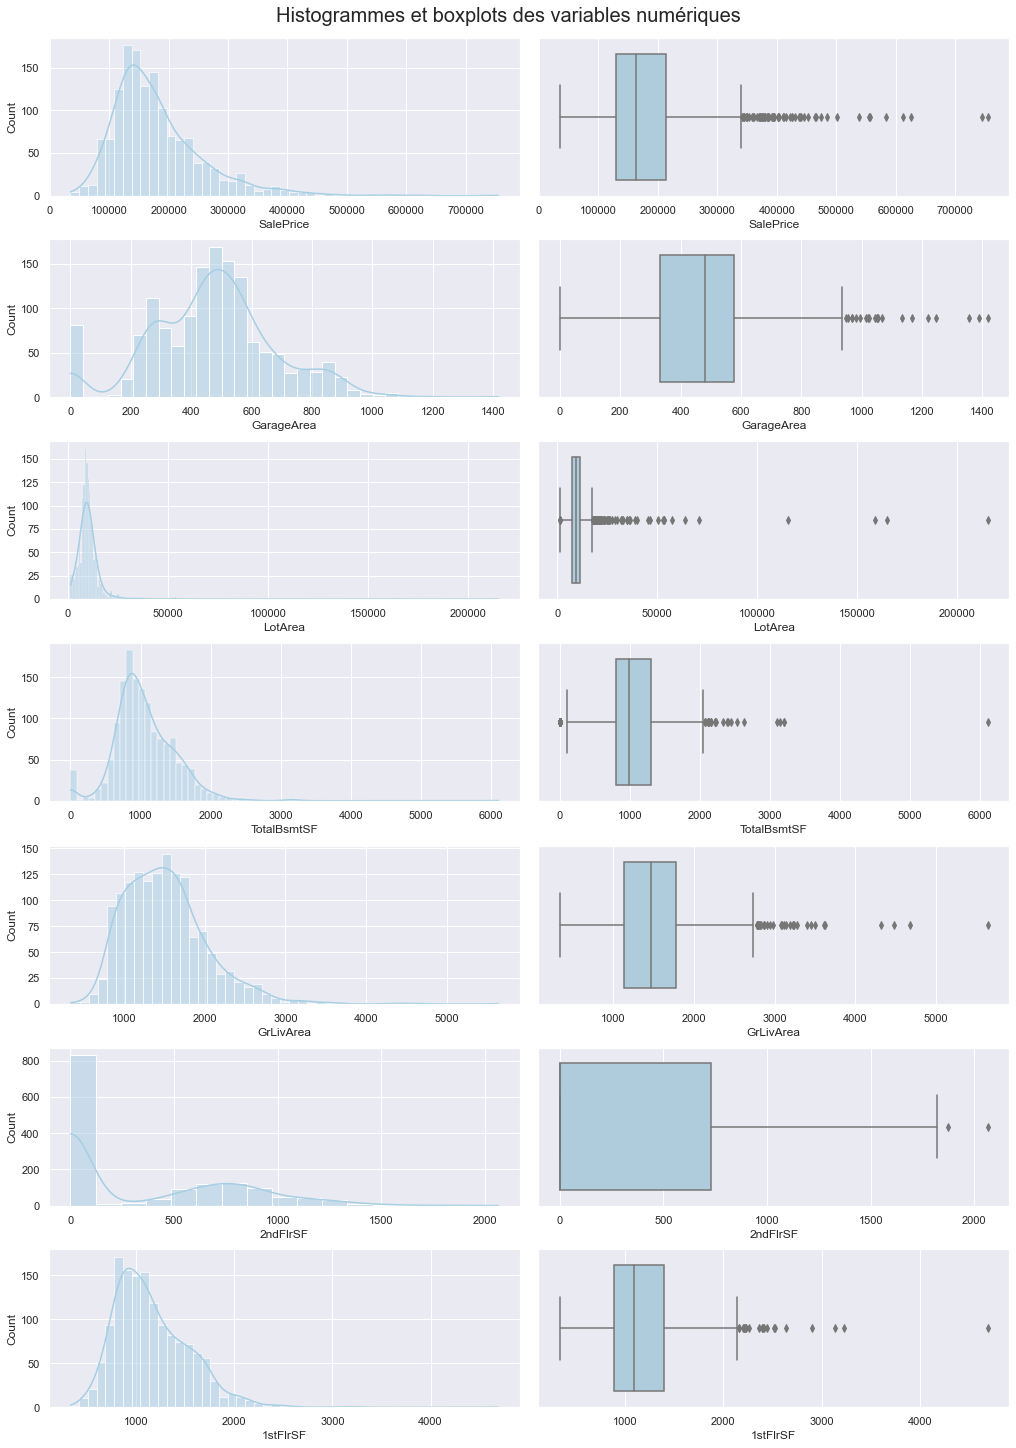

In [4]:
plot_variables();

On observe des distributions postives skews (asymétriques à droite) en dehors des disbributions des variables "GarageAre" et "2ndFlrSf".

On peut également observer de nombreux outliers au-delà du 3ème quartile qui sont à l'origine des positives skews et de l'étalement des distributions.

Nous pouvons supposer que la suppression de ces outiers permettra de tendre vers des distributions normales.

On peut noter l'anomalie sur le boxplot concernant la surface habitable au 2nd étage : la représentation des quartiles est abérrante car environ 33% des données ont une valeur de 0. 

In [5]:
count_outliers(df_clean)

* Unnamed: 0 n'a pas d'outliers.
* La colonne SalePrice à 4.181% d'outliers
* La colonne GarageArea à 1.439% d'outliers
* La colonne LotArea à 4.866% d'outliers
* La colonne TotalBsmtSF à 4.181% d'outliers
* La colonne GrLivArea à 2.125% d'outliers
* La colonne 2ndFlrSF à 0.137% d'outliers
* La colonne 1stFlrSF à 1.371% d'outliers


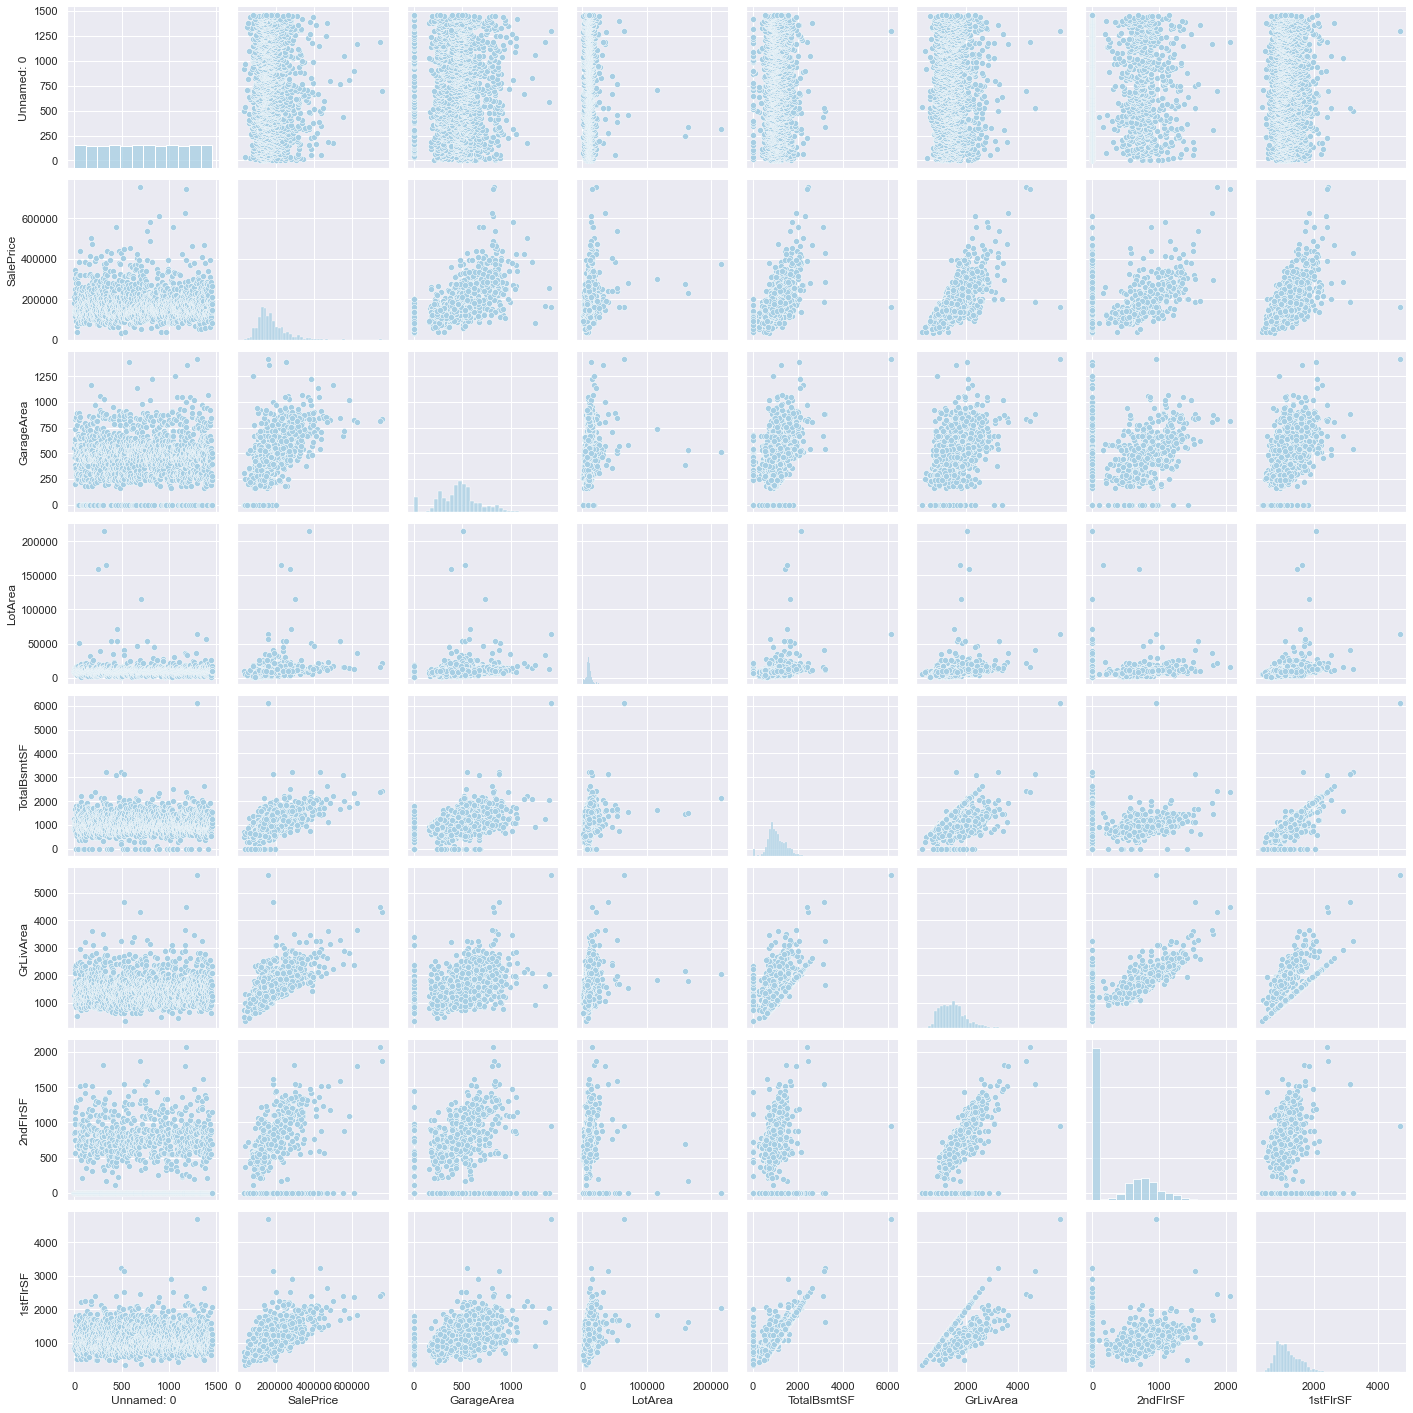

In [6]:
display_pairplot(df_clean);

Le pairplot nous montre des potentielles régréssions linéaires entre les différentes variables numériques de notre DataFrame. 

On peut observer que les outliers ou les valeurs minimums égales à zero entrainent une dispersion particulière

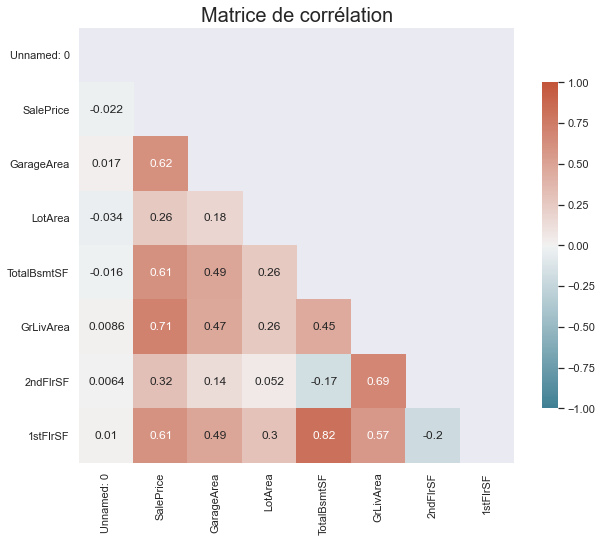

In [7]:
display_corr_matrix();

Le précédent pairplot nous a montré les correlations potentielles entre notre target y et nos features X. 

La matrice de correlation nous indique qu'il  y a effectivement un certain niveau de correlation possible pour expliquer notre y. 

Plus le coefficcient se rapproche de 1 plus il y a une correlation. Les Features "GaragesArea", "TotalBsmtSF", "GrLivArea" et "1stFlrSF" ont un coeficient entre 0.61 et 0.71. Cela permet une possible explication du prix de vente mais laisse supposer qu'une feature ne suffira pas à expliquer notre target (une forte corrélation n'est pas synonyme de causalité)

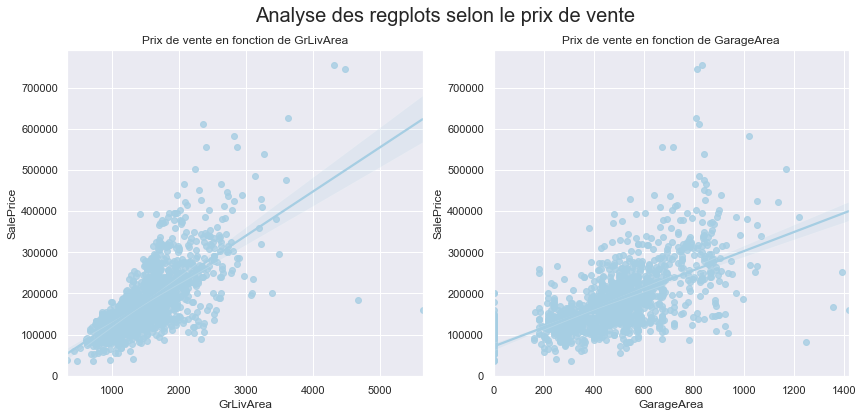

In [8]:
display_regplot();

# Regression linéaire sans train_test_split (data leakage)

## Avec statsmodels

In [9]:
statsmodels_lr()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1472.
Date:                Thu, 20 May 2021   Prob (F-statistic):          3.47e-223
Time:                        16:59:36   Log-Likelihood:                -18022.
No. Observations:                1459   AIC:                         3.605e+04
Df Residuals:                    1457   BIC:                         3.606e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4479.780      4.144      0.000    9778.429    2.74e+04
X            107.1648      2.793     38.367      0.000     101.686     112.644
==============================================================================
Omnibus:                      260.946   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3443.891
Skew:                           0.408   Prob(JB):                         0.00
Kurtosis:                      10.482   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Les résultats de notre modèle nous permettent plusieurs interprétation. 

Le **R2** de notre modèle est de 0.502, cela induit que notre modèle est en mesure d'expliquer la moitié de la variance d'une variable vis à vis de la variance d'une seconde variable. 

La **P-value** de notre modèle est très proche de 0 ainsi que pour notre feature. Cette **p-value** est un nombre décrivant la probabilité que nos données se soient produites par hasard. Une valeur p inférieure à 0,05 est statistiquement significative. Cela nous indique des preuves solides contre l'hypothèse nulle, car il y a moins de 5% de probabilité que la valeur nulle soit correcte (et les résultats sont aléatoires). Par conséquent, nous rejetons l'hypothèse nulle et acceptons l'hypothèse alternative. 

L'ensemble de ces indicateurs indiquent que notre feature est pertinente et significative mais qu'a elle seule le modèle manque de robustesse et de précision.

## Avec SkLearn

In [10]:
sklearn_lr()

(0.5025665187228653, LinearRegression())

Nous observons un retour d'indicateur plus réduit via Sklearn comparé à StatsModels. En effet, seulement le R2 est retourné et correspond à celle de notre précédement modèl via StatsModels

### Prédiciton du prix d'un logement en fonction de sa surface en pied carré (avec data leakage). 

In [11]:
sklearn_pred(3333)

Le prix predictif pour une surface de 3333 pieds carrés de l'appartement est de 375746.242 $


### Prediction avec Sklearn avec séparation des jeux de données (train_test_split)

In [12]:
train_model()

Train set: (1167, 1) 
Test set: (292, 1)
0.49641224533412276
0.5283412130038969


(None, LinearRegression())

Le DataFrame a été split en une partie train pour entrainer le modèle et une partie test pour tester le modèle sur des données qu'il ne connait pas. <br> <br>
La R2 du modèle avec le set Train est plus bas de trois points par rapport au modèle entrainé a qui on a passé le set de Test. 

In [13]:
predict_model()

Train set: (1167, 1) 
Test set: (292, 1)
Train set: (1167, 1) 
Test set: (292, 1)
0.49641224533412276
0.5283412130038969


,Reals_values,Prédictives_values
0,195400,148669
1,148500,126693
2,131400,141841
3,140000,119652
4,277500,186326
...,...,...
287,108000,180886
288,255900,264096
289,122500,165417
290,335000,288525


On remarque avec la valeur réel et l'estimation par le modèle un décalage important. Le modèle n'est donc pas complet et l'ajout de features pourrait accroitre la robustesse du modèle dans ses prédictions.